##**A. Basic steps to install dataset from Kaggle**

In [4]:
! pip install -q kaggle
! mkdir ~/.kaggle

# This step will require an API Token 'kaggle.json': Find more about it here: https://www.kaggle.com/general/74235 
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

# Downloading from https://www.kaggle.com/datasets/saurabhshahane/barkvn50
!kaggle datasets download -d saurabhshahane/barkvn50

# Unzipping the dataset
!unzip barkvn50.zip

Streaming output truncated to the last 5000 lines.
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1340.JPG  
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1341.JPG  
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1342.JPG  
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1343.JPG  
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1344.JPG  
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1345.JPG  
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1347.JPG  
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_2914.JPG  
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_2915.JPG  
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_2916.JPG  
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_2917.JPG  
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_2918.JPG  
  inflating: BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_2919.JPG  


**Checkpoint A:** We have downloaded the data. We should now organize and clean it as per our requirements.

##**B. Getting the dataset ready**

---
The image data we have is in individual folders with each folder named after the class label of those images. We will convert all this data into three data frames - Train, Validation, and Test. 


In [5]:
# Importing the required tools and libraries

import os # For listing sub-directories, files, etc.
import pandas as pd # For dataframes, data-cleaning, etc.
import numpy as np # For working with arrays, etc.

In [6]:
# Converting class names to numeric labels
path = '/content/BarkVN-50/BarkVN-50_mendeley'
labels={} # Initialise empty dictionary

label=0 # Counter
for subdir in os.listdir(path):
    labels[subdir] = label # Creating dictionary -> {label_name: label_numeral}
    label+=1

print(labels) # Check the dictionary

{'Psidium guajava': 0, 'Chrysophyllum cainino': 1, 'Veitchia merrilli': 2, 'Magnolia alba': 3, 'Spondias mombin L': 4, 'Senna siamea': 5, 'Eucalyptus': 6, 'Melia azedarach': 7, 'Wrightia religiosa': 8, 'Wrightia': 9, 'Annona squamosa': 10, 'Adenanthera microsperma': 11, 'Hopea': 12, 'Persea': 13, 'Musa': 14, 'Acacia': 15, 'Tectona grandis': 16, 'Polyalthia longifolia': 17, 'Prunnus': 18, 'Barringtonia acutangula': 19, 'Dipterocarpus alatus': 20, 'Dalbergia oliveri': 21, 'Khaya senegalensis': 22, 'Hevea brasiliensis': 23, 'Pterocarpus macrocarpus': 24, 'Melaleuca': 25, 'Anacardium occidentale': 26, 'Artocarpus heterophyllus': 27, 'Citrus aurantiifolia': 28, 'Tamarindus indica': 29, 'Carica papaya': 30, 'Khaya senegalensis A.Juss': 31, 'Terminalia catappa': 32, 'Ficus racemosa': 33, 'Casuarina equisetifolia': 34, 'Ficus microcarpa': 35, 'Mangifera': 36, 'Artocarpus altilis': 37, 'Prunus salicina': 38, 'Syzygium nervosum': 39, 'Adenium species': 40, 'Nephelium lappaceum': 41, 'Citrus gran

In [7]:
# Create a dataframe of all image names with numeric labels
img_db = pd.DataFrame(columns=['img_name','label']) # Dataframe with img_name and label columns
path = '/content/BarkVN-50/BarkVN-50_mendeley'

for subdir in os.listdir(path): # List all the sub-directories
    label = labels[subdir] # Label name fetches the corresponding numeric label
    for img in os.listdir(os.path.join(path,subdir)): 
        data = {'img_name': path+'/'+subdir+'/'+img, 'label': label} 
        img_db = img_db.append(data, ignore_index = True) # Appending the each row to the dataframe

In [8]:
# Check total number of images and the database structure
print(img_db.shape)
img_db.head()

(5578, 2)


,img_name,label
0,/content/BarkVN-50/BarkVN-50_mendeley/Psidium ...,0
1,/content/BarkVN-50/BarkVN-50_mendeley/Psidium ...,0
2,/content/BarkVN-50/BarkVN-50_mendeley/Psidium ...,0
3,/content/BarkVN-50/BarkVN-50_mendeley/Psidium ...,0
4,/content/BarkVN-50/BarkVN-50_mendeley/Psidium ...,0


**B-1. Splitting the dataset**

In [9]:
# Split the dataframe into training, validation and test dataframes
# with ratio 70:10:20 respectively
df_train, df_val, df_test = np.split(img_db.sample(frac=1, random_state=42), [int(.7*len(img_db)), int(.9*len(img_db))])

In [10]:
# Check df_train
print(df_train.shape)
df_train.head()

(3904, 2)


,img_name,label
2633,/content/BarkVN-50/BarkVN-50_mendeley/Pterocar...,24
1550,/content/BarkVN-50/BarkVN-50_mendeley/Musa/IMG...,14
724,/content/BarkVN-50/BarkVN-50_mendeley/Eucalypt...,6
2788,/content/BarkVN-50/BarkVN-50_mendeley/Anacardi...,26
468,/content/BarkVN-50/BarkVN-50_mendeley/Magnolia...,3


In [11]:
# Check df_val
print(df_val.shape)
df_val.head()

(1116, 2)


,img_name,label
3811,/content/BarkVN-50/BarkVN-50_mendeley/Ficus ra...,33
1535,/content/BarkVN-50/BarkVN-50_mendeley/Musa/IMG...,14
2913,/content/BarkVN-50/BarkVN-50_mendeley/Anacardi...,26
3188,/content/BarkVN-50/BarkVN-50_mendeley/Citrus a...,28
1273,/content/BarkVN-50/BarkVN-50_mendeley/Adenanth...,11


In [12]:
# Check df_test
print(df_test.shape)
df_test.head()

(558, 2)


,img_name,label
3236,/content/BarkVN-50/BarkVN-50_mendeley/Citrus a...,28
1540,/content/BarkVN-50/BarkVN-50_mendeley/Musa/IMG...,14
1217,/content/BarkVN-50/BarkVN-50_mendeley/Adenanth...,11
2681,/content/BarkVN-50/BarkVN-50_mendeley/Melaleuc...,25
2993,/content/BarkVN-50/BarkVN-50_mendeley/Anacardi...,26


**Checkpoint B:** Now that we have separated and organized the data according to our needs, we should set up our model and begin training.

##**C. Setting up and training the ResNet18 model**

---

We choose the ResNet18 model as it will work perfectly for a moderate amount of data as given, whilst taking less time for training. We use the pre-trained weights from the PyTorch implementation of ResNet18. The following section is inspired by this [Colab Notebook](https://colab.research.google.com/drive/1Ot8Wzl3GpbG64dy_7FzPv9187ePHLyxY?usp=sharing#scrollTo=02UT_mzRDpa8)

In [13]:
# Importing the required tools and libraries
import torch # Using Pytorch
import torchvision
import torch.nn as nn # For tasks related to neural networks
import torch.optim as optim 
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

import random

# glob is used to grab files from a directory
import glob

# PIL is used to help load images
from PIL import Image

# tqdm is a progress bar for us to refer to while training
from tqdm import tqdm

# matplotlib.pyplot will allow us to plot out our training and validation loss 
import matplotlib.pyplot as plt

# Imshow will allow us to show our images
from matplotlib.pyplot import imshow

**C-1. Creating a template to feed into the dataloader for smooth data access**

In [14]:
# Create a Data class to hold the data and corresponding class labels
class Data(Dataset):

    # Create the constructor for the Data class (training: Whether or not to get validation or training data), (transform: What type of transformation to apply to images)
    def __init__(self, df='train', transform=True):
        if transform:
            # Create a object containing series of transformations
            self.transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5), transforms.Resize(224), transforms.CenterCrop(224), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])
        else:
            # Create a object containing series of transformations without much image manipulation 
            self.transform = transforms.Compose([transforms.Resize(224), transforms.CenterCrop(224), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])
            
        # Setting the dataframe according to the type of data
        if(df=='train'):
          df=df_train
        elif(df=='val'):
          df=df_val
        elif(df=='test'):
          df=df_test
        
        # Data samples
        self.x = df['img_name'].tolist()
        print(self.x) # To verify if list is not empty

        # Data labels
        self.y = df['label'].tolist()
        print(self.y) # To verify if list is not empty

    # Return the length of the Data if len() is called on it  
    def __len__(self):
        return len(self.x)
    
    # Handles what happens when something tries to access indices of the Data class
    # This is needed for the DataLoaders
    def __getitem__(self, idx):
        x = Image.open(self.x[idx]).convert('RGB')
        x = self.transform(x)
        return x,self.y[idx] # Return data and labels

In [15]:
# Create training instance of the Data class   
data_train = Data(df='train', transform=True)

# Create validation instance of the Data class   
data_val = Data(df='val', transform=False)

# Create test instance of the Data class   
data_test = Data(df='test', transform=False)

# Dataloader for training samples
trainloader = DataLoader(dataset = data_train, batch_size = 32, shuffle = True)
# Dataloader for validation samples
valloader = DataLoader(dataset = data_val, batch_size = 32, shuffle = True)
# Dataloader for test samples
testloader = DataLoader(dataset = data_test, batch_size = 32, shuffle = True)


['/content/BarkVN-50/BarkVN-50_mendeley/Pterocarpus macrocarpus/IMG_5735.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Musa/IMG_2228.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Eucalyptus/IMG_4271.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Anacardium occidentale/IMG_4795.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Magnolia alba/IMG_5627.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Gmelina arborea Roxb/IMG_6094.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Hevea brasiliensis/IMG_2122.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Syzygium nervosum/IMG_3080.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Delonix regia/IMG_4508.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Polyalthia longifolia/IMG_6539.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Dipterocarpus alatus/IMG_4811.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Khaya senegalensis A.Juss/IMG_5352.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Khaya senegalensis A.Juss/IMG_5299.JPG', '/content/BarkVN-50/BarkVN-50_mendeley/Tamarindus ind

In [16]:
# Loading the GPU device if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Check for GPU
print(torch.cuda.is_available())

cuda:0
True


**C-2. Structuring the ResNest18 model**

In [17]:
# (out_1: ouput of 1st layer), (out_2: ouput of 2nd layer)
def createModel(out_1, out_2):
    num_classes = 50 # Number of output labels

    # Loading ResNet18
    model = torchvision.models.resnet18(pretrained = True)

    # Freeze all of the weights in ResNet18
    for param in model.parameters():
        param.requires_grad = False

    # Creating 3 Linear connected layers which can be trained
    fc1 = nn.Linear(512, out_1)
    fc2 = nn.Linear(out_1, out_2)
    fc3 = nn.Linear(out_2, num_classes)

    layers = [fc1, fc2, fc3]
    
    for linearLayer in layers:
        # Applying He initialization to all layers
        nn.init.kaiming_uniform_(linearLayer.weight, nonlinearity='leaky_relu')
    


    # Setting Resnet's fully connected layer to our collection of three Linear layers with nn.Sequential
    model.fc = nn.Sequential(fc1, nn.LeakyReLU(),fc2, nn.LeakyReLU(),fc3)
    
    # Sending the device to the GPU if avaliable
    model.to(device)

    return model

**C-3. Training the model**

In [18]:
#(model: model to train), (criterion: loss function for the model), (optimizer, what optimizer to use)
def train_resnet18(model, criterion, optimizer, file, epochs=9, trainLoss=[], validationLoss=[]):
    print("Starting training")
    for epoch in range(epochs):
        print(f"Epoch Number: {epoch}")

        testAccuracy = 0
        totalLoss = 0
        for x, y in tqdm(trainloader):
            # Put model into training mode
            model.train()
            # Send tensors to GPU if available for faster processing
            x, y = x.to(device), y.to(device)
            # Zero out gradients
            optimizer.zero_grad()
            # Make a prediction
            y_hat = model(x)
            # Calculate the loss
            l = criterion(y_hat, y)
            # Update the total loss
            totalLoss += l.item()
            # Initiate backpropagation
            l.backward()
            
            # Update parameters
            optimizer.step()

            # Grab the index with the largest probability from y_hat
            y_hat = torch.argmax(y_hat, 1)
          
            testAccuracy += (y_hat == y).sum().item()
        
        trainLoss.append(totalLoss)
        print(f"Training Accuracy: {testAccuracy / len(data_train)}")
        
        valAccuracy = 0
        totalLoss = 0
        
        for x_val, y_val in valloader:
            # Put the model into evaluation mode
            model.eval()
            # Send the evaluation tensors to the GPU if it's available
            x_val, y_val = x_val.to(device), y_val.to(device)
            # Calculate loss to keep track of validation loss
            l = criterion(model(x_val), y_val)
            totalLoss += l
            # Grab the index with the largest probability from the model's output
            y_hat = torch.argmax(model(x_val), 1)
            valAccuracy += (y_hat == y_val).sum().item()
        
        print(f"Validation Accuracy: {valAccuracy / len(data_val)}")
        validationLoss.append(totalLoss)
        
        # Save our model for each epoch
        torch.save(model.state_dict(), file)
        
    return trainLoss, validationLoss, model

In [28]:
# Create a model using our function
model = createModel(256, 128)

# Define our loss and optimizers
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# Specify output file name to save model weights
file = "ResnetFinal.pth"

# Try to use Colab's GPU here, otherwise it will take a long time to train.
output = train_resnet18(model, criterion, optimizer, file, epochs=20)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting training
Epoch Number: 0


100%|██████████| 122/122 [00:24<00:00,  4.96it/s]


Training Accuracy: 0.3980532786885246
Validation Accuracy: 0.7060931899641577
Epoch Number: 1


100%|██████████| 122/122 [00:24<00:00,  5.05it/s]


Training Accuracy: 0.7476946721311475
Validation Accuracy: 0.8333333333333334
Epoch Number: 2


100%|██████████| 122/122 [00:23<00:00,  5.29it/s]


Training Accuracy: 0.8409323770491803
Validation Accuracy: 0.8611111111111112
Epoch Number: 3


100%|██████████| 122/122 [00:23<00:00,  5.25it/s]


Training Accuracy: 0.8698770491803278
Validation Accuracy: 0.8808243727598566
Epoch Number: 4


100%|██████████| 122/122 [00:23<00:00,  5.25it/s]


Training Accuracy: 0.9031762295081968
Validation Accuracy: 0.9068100358422939
Epoch Number: 5


100%|██████████| 122/122 [00:23<00:00,  5.12it/s]


Training Accuracy: 0.921875
Validation Accuracy: 0.8942652329749103
Epoch Number: 6


100%|██████████| 122/122 [00:27<00:00,  4.51it/s]


Training Accuracy: 0.9334016393442623
Validation Accuracy: 0.9184587813620072
Epoch Number: 7


100%|██████████| 122/122 [00:24<00:00,  5.02it/s]


Training Accuracy: 0.9380122950819673
Validation Accuracy: 0.9005376344086021
Epoch Number: 8


100%|██████████| 122/122 [00:22<00:00,  5.31it/s]


Training Accuracy: 0.9439036885245902
Validation Accuracy: 0.9130824372759857
Epoch Number: 9


100%|██████████| 122/122 [00:23<00:00,  5.29it/s]


Training Accuracy: 0.9515881147540983
Validation Accuracy: 0.9130824372759857
Epoch Number: 10


100%|██████████| 122/122 [00:22<00:00,  5.31it/s]


Training Accuracy: 0.9510758196721312
Validation Accuracy: 0.9068100358422939
Epoch Number: 11


100%|██████████| 122/122 [00:23<00:00,  5.27it/s]


Training Accuracy: 0.9579918032786885
Validation Accuracy: 0.9301075268817204
Epoch Number: 12


100%|██████████| 122/122 [00:23<00:00,  5.25it/s]


Training Accuracy: 0.9559426229508197
Validation Accuracy: 0.9157706093189965
Epoch Number: 13


100%|██████████| 122/122 [00:23<00:00,  5.24it/s]


Training Accuracy: 0.9713114754098361
Validation Accuracy: 0.921146953405018
Epoch Number: 14


100%|██████████| 122/122 [00:23<00:00,  5.26it/s]


Training Accuracy: 0.9590163934426229
Validation Accuracy: 0.9121863799283154
Epoch Number: 15


100%|██████████| 122/122 [00:23<00:00,  5.25it/s]


Training Accuracy: 0.9664446721311475
Validation Accuracy: 0.9399641577060932
Epoch Number: 16


100%|██████████| 122/122 [00:23<00:00,  5.29it/s]


Training Accuracy: 0.9631147540983607
Validation Accuracy: 0.8915770609318996
Epoch Number: 17


100%|██████████| 122/122 [00:23<00:00,  5.29it/s]


Training Accuracy: 0.9636270491803278
Validation Accuracy: 0.9265232974910395
Epoch Number: 18


100%|██████████| 122/122 [00:23<00:00,  5.29it/s]


Training Accuracy: 0.9641393442622951
Validation Accuracy: 0.8987455197132617
Epoch Number: 19


100%|██████████| 122/122 [00:23<00:00,  5.30it/s]


Training Accuracy: 0.9608094262295082
Validation Accuracy: 0.9336917562724014


**C-4. Plotting Training and Validation loss curves**

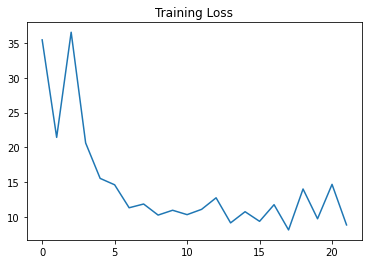

In [29]:
# Plotting Training Loss curve
values = torch.Tensor(output[1]).cpu()

plt.plot(values)
plt.title("Training Loss")
plt.show()

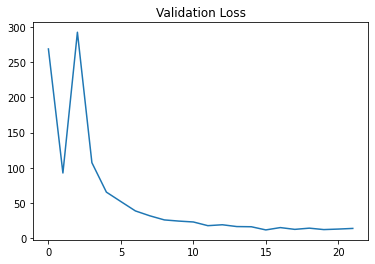

In [30]:
# Plotting Validation Loss curve

values = torch.Tensor(output[0]).cpu()

plt.plot(values)
plt.title("Validation Loss")
plt.show()

**Checkpoint C:** We can see that the validation loss curve is smooth with a steady decrease in loss as the training proceeds. Without further complications in setting the hyper-parameters, changing optimizers, etc. we should try to test this model with the test data that we had separated earlier.

##**D. Testing the model**

In [31]:
# To get a list of output labels
classes = list(labels.keys())
print("Classes: " + str(classes))

# Create a function to show an image
# (img: tensor of (C, H, W))

def showImage(img, truth, i):
  transform = transforms.ToPILImage()
  imshow(transform(img))
  plt.title(f"True Label: {classes[truth]}")

Classes: ['Psidium guajava', 'Chrysophyllum cainino', 'Veitchia merrilli', 'Magnolia alba', 'Spondias mombin L', 'Senna siamea', 'Eucalyptus', 'Melia azedarach', 'Wrightia religiosa', 'Wrightia', 'Annona squamosa', 'Adenanthera microsperma', 'Hopea', 'Persea', 'Musa', 'Acacia', 'Tectona grandis', 'Polyalthia longifolia', 'Prunnus', 'Barringtonia acutangula', 'Dipterocarpus alatus', 'Dalbergia oliveri', 'Khaya senegalensis', 'Hevea brasiliensis', 'Pterocarpus macrocarpus', 'Melaleuca', 'Anacardium occidentale', 'Artocarpus heterophyllus', 'Citrus aurantiifolia', 'Tamarindus indica', 'Carica papaya', 'Khaya senegalensis A.Juss', 'Terminalia catappa', 'Ficus racemosa', 'Casuarina equisetifolia', 'Ficus microcarpa', 'Mangifera', 'Artocarpus altilis', 'Prunus salicina', 'Syzygium nervosum', 'Adenium species', 'Nephelium lappaceum', 'Citrus grandis', 'Erythrina fusca', 'Cedrus', 'Delonix regia', 'Cocos nucifera', 'Lagerstroemia speciosa', 'Gmelina arborea Roxb', 'Cananga odorata']


In [32]:
model = createModel(256, 128)

# Load the weigths of the trained model

def loadWeights(model, path):
  # Check if GPU is available
  if torch.cuda.is_available():
    map_location=lambda storage, loc: storage.cuda()
  else:
    map_location='cpu'

  # Load the weights for the model
  model.load_state_dict(torch.load(path, map_location=map_location))

loadWeights(model, "ResnetFinal.pth")

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


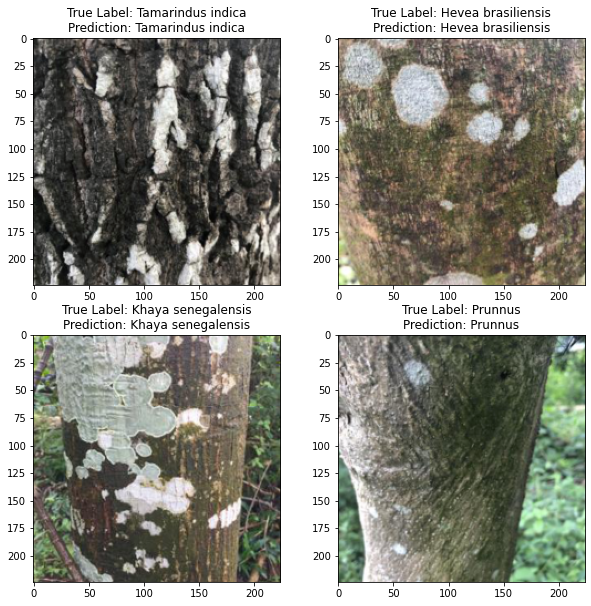

In [33]:
# Turn model into evaluation mode for testing
model.eval()

plt.figure(figsize=(10,10))

for i in range(4):
  randomIndex = random.randint(0, len(data_test) - 1)

  test_img = data_test[randomIndex][0] # Test image
  gt = data_test[randomIndex][1] # Ground truth label

  # Un-normalize data for visualization
  mean = torch.tensor([0.485, 0.456, 0.406], dtype=torch.float32)
  std = torch.tensor([0.229, 0.224, 0.225], dtype=torch.float32)

  unnormalized = test_img * std[:, None, None] + mean[:, None, None]

  # Convert image into (B,C,H,W)
  image = test_img.view(-1, 3, 224, 224).to(device)
  output = model(image)

  transform = transforms.ToPILImage()
  plt.subplot(2,2,i+1)

  # Show the CNN's prediction
  pred = classes[torch.argmax(output, 1).detach().item()]
  
  plt.title(f"True Label: {classes[gt]}" +'\n' + f"Prediction: {pred}")
  imshow(transform(unnormalized))

**Checkpoint D:** We can see via the small number of test images that we have randomly picked that our model works quite well on the test data. To get the overall view, let's calculate some defining metrics.

##**E. Calculating Metrics**

---
We calculate precision and recall and thus F1 score to see the bigger picture and check our model performs overall.


In [34]:
from sklearn.metrics import precision_recall_fscore_support

In [35]:
lst_gt = [] # All ground truths
lst_pred = [] # All predicitons

for i in range(len(df_test)):
  test_img = data_test[i][0] # Test image
  gt = data_test[i][1] # Ground truth label

  lst_gt.append(gt)

  # Convert image into (B,C,H,W)
  image = test_img.view(-1, 3, 224, 224).to(device)
  output = model(image)

  # Getting the prediction
  pred = torch.argmax(output, 1).detach().item()
  lst_pred.append(pred)
  pred = classes[pred]

In [36]:
precision, recall, f1, _ = precision_recall_fscore_support(lst_gt, lst_pred, average='macro')
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1: " + str(f1))

Precision: 0.922760679722754
Recall: 0.9067833114597819
F1: 0.905577637664062


**Checkpoint E:** We have a respectable F1 score considering the time for which we have trained the model and the amount of data we have at our disposal. We can further tune the hyper-parameters to better the results. We can further explore the EfficientNet family, larger versions of ResNet and other such CNNs.